# Regression Analysis :- Simple linear regreesion
Predict something with a numeric/cont outcome

# 1.IMPORT DATAFRAME

In [123]:
import pandas as pd
A = pd.read_csv("D:/Datasets/50_Startups.csv")

# 2. PERFORM PROFILING

In [124]:
A.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [125]:
A.shape

(50, 5)

In [126]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# Correlation Analysis

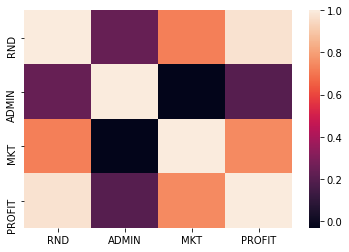

In [127]:
import matplotlib.pyplot as plt
import seaborn as sb

sb.heatmap(A.corr())

In [128]:
A.corr()

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


<!-- # From above heat map and correlation funcation we can see the correlation between 2 variables.

# Ideal correlation values are 

# Limit: Coefficient values can range from +1 to -1, where +1 indicates a perfect positive relationship, -1 indicates a perfect negative relationship, and a 0 indicates no relationship exists..

# Degree of correlation:

# Perfect: If the value is near ± 1, then it said to be a perfect correlation: as one variable increases, the other variable tends to also increase (if positive) or decrease (if negative).
# High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.
# Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
# Low degree: When the value lies below + .29, then it is said to be a small correlation.
# No correlation: When the value is zero. -->

#  From above heatmap  we can find out the corelation between the variables.
# Limit: 

Coefficient values can range from +1 to -1, where +1 indicates a perfect positive relationship, -1 indicates a perfect negative relationship, and a 0 indicates no relationship exists.

# Degree of correlation:

Perfect: If the value is near ± 1, then it said to be a perfect correlation: as one variable increases, the other variable tends to also increase (if positive) or decrease (if negative).

High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.

Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
Low degree: When the value lies below + .29, then it is said to be a small correlation.

No correlation: When the value is zero.    
    

# From above we can say that...

Profit ~ RND    ------> Best pridictor 

Profit ~ MKT    ------> Modrate pridictor

Profit ~ ADMIN  ------> Worst pridictor


#  4. DATA --> TRAINING , TESTING

In [113]:
X = A[['RND']]                               # X-----> independent variables
Y = A[['PROFIT']]                            # Y-----> dependent variables (we will predict value of profit basesd on RND variable)

In [134]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X, Y, test_size=0.2, random_state=30)
print("We have devided data by 20% in testing data. and 80% in traning data.")
print("Traning data of X",xtrain.count(),"\nTesting data of X",xtest.count(),"\nTraning data of Y",ytrain.count(),"\nTesting data of Y",ytest.count())


We have devided data by 20% in testing data. and 80% in traning data.
Traning data of X RND    40
dtype: int64 
Testing data of X RND    10
dtype: int64 
Traning data of Y PROFIT    40
dtype: int64 
Testing data of Y PROFIT    10
dtype: int64


# 5. CREATE MODEL ON TRAINING SET

In [115]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(xtrain,ytrain)          # we have to fit our model on traning dataset.

# 6. MAKE PREDICTIONS ON TESTING SET

In [116]:
pred = model.predict(xtest)

# 7. COMPARE PREDICTED AND ACHIEVED RESULTS

In [132]:
xtest['actual_profit'] = ytest
xtest['predicted_profit'] = pred
xtest['prediction_error'] = ytest - pred
xtest

C:\Users\YGIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\YGIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\YGIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,RND,actual_profit,predicted_profit,prediction_error
41,27892.92,77798.83,71831.063191,5967.766809
20,76253.86,118474.03,113463.267038,5010.762962
32,63408.86,97427.84,102405.465879,-4977.625879
43,15505.73,69758.98,61167.374288,8591.605712
10,101913.08,146121.95,135552.371957,10569.578043
29,65605.48,101004.64,104296.457485,-3291.817485
33,55493.95,96778.92,95591.802899,1187.117101
25,64664.71,107404.34,103486.582234,3917.757766
34,46426.07,96712.80,87785.589276,8927.210724
19,86419.70,122776.86,122214.675162,562.184838


# 8. Finding out Errors in prediction

In [133]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print("Overall model error MAE is %.2f"%mean_absolute_error(ytest,pred))
print("Overall model error MSE is %.2f"%mean_squared_error(ytest,pred))

Overall model error MAE is 5300.34
Overall model error MSE is 37863569.26


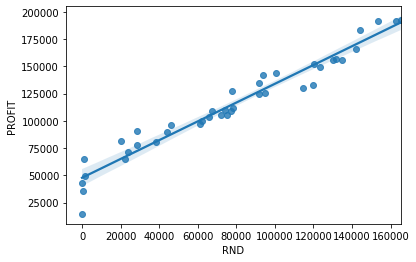

In [135]:
sb.regplot(xtrain,ytrain)